In [ ]:
# This program will use an artificial recurrant neural network called Long Short Term Momeory (LSTM) 
# to predict the closing stock price of a corpaoration (Apple, Inc) using the past 60 day stock price

In [21]:
#imported libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
#get the stock quote

df = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2020-04-8')

#show data

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-04-02,245.149994,236.899994,240.339996,244.929993,41483500.0,244.929993
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001


In [23]:
# get number of rows and columns

df.shape

(2080, 6)

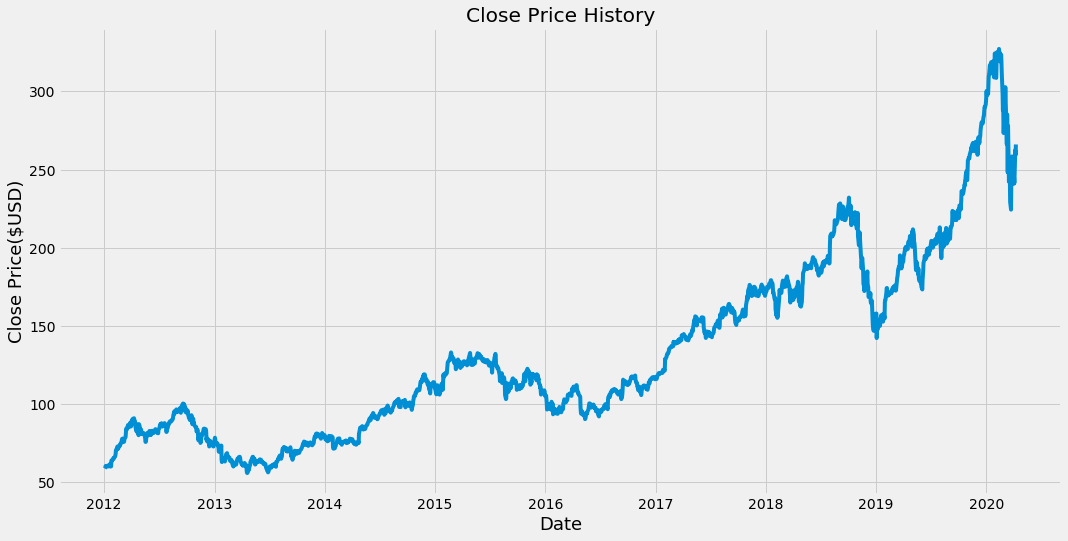

In [24]:
#visulize data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price($USD)', fontsize=18)
plt.show()

In [25]:
# create new data from with only close columns

data = df.filter(['Close'])

#convert to numpy array

dataset = data.values

# get the numberof rows o traine the model on

training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1664

In [26]:
# scale the data
scaler = MinMaxScaler(feature_range = (0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.7615047 ],
       [0.75030391],
       [0.77476879]])

In [27]:
# Create the training data set
# Create the Scaled training data set

train_data = scaled_data[0:training_data_len , :]

# split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    
    y_train.append(train_data[i, 0])
    
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [28]:
#convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

#reshape data

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1604, 60, 1)

In [29]:
# build lstm model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
#compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1604/1604 [==============================] - 46s 29ms/step - loss: 7.1011e-04


In [37]:
# Create testing data set
# Create new array from containing scaled values
test_data = scaled_data[training_data_len - 60: , :]

#create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [38]:
# convert the data to a numpy array

x_test = np.array(x_test)

In [39]:
#reshape data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
# get models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [46]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test) ** 2)
rmse

8.810368831341084

/Users/waltercole/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


TypeError: unhashable type: 'numpy.ndarray'

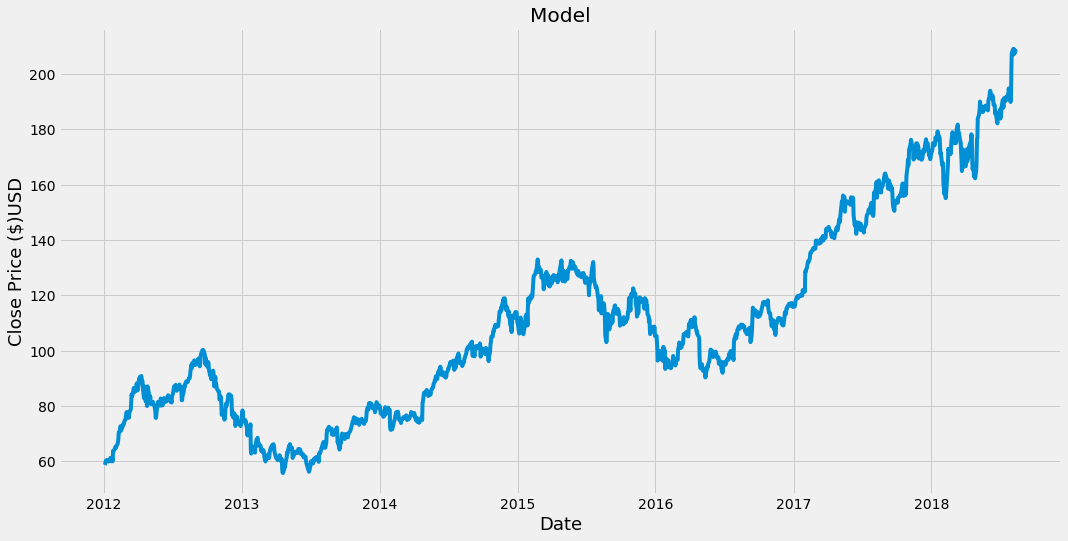

In [53]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)USD', fontsize=18)
plt.plot(train['Close'])
plt.plot([['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [51]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-14,209.750000,198.953796
2018-08-15,210.240005,199.726929
2018-08-16,213.320007,200.420380
2018-08-17,217.580002,201.286560
2018-08-20,215.460007,202.545395
...,...,...
2020-04-02,244.929993,238.316833
2020-04-03,241.410004,238.098724
2020-04-06,262.470001,237.423401


In [55]:
#get quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-04-08')

#create new dataframe 
new_df = apple_quote.filter(['Close'])

#get the last 60 days closing price values and convert the dataframe to an array

last_60_days = new_df[-60:].values

#scale data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list

X_test = []

#append past 60 days to x_test list

X_test.append(last_60_days_scaled)

#convert ther X-test dataset to a numpy array

X_test = np.array(X_test)
#reshapoe

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)





[[242.40675]]


In [56]:
apple2_quote = web.DataReader('AAPL', data_source='yahoo', start='2020-04-08', end='2020-04-08')

print(apple2_quote['Close'])


Date
2020-04-08    266.070007
Name: Close, dtype: float64
